In [1]:
#AI-TECHGYM-1-7-A-2
#教師なし学習 アソシエーション分析

import pandas as pd
import urllib.request as req

%matplotlib inline

#実行フォルダ
import os
os.chdir(r"C:\Users\tsuchida\Documents\techgym_セミナー\TortoiseGit_resorce\techgym_ai\Chapter_1\Answer_sheet\AI_Chapter1_saved_files")

#githubからファイルをDownloadできない場合は以下を実行
#url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
#req.urlretrieve(url, "Online_Retail.xlsx")
#trans = pd.read_excel('Online_Retail.xlsx', sheet_name='Online Retail')
#trans.to_csv("./Online_Retail.csv")

#購買データの読み込み
trans = pd.read_csv('Online_Retail.csv')

#####前処理#####
#キャンセルデータと不明なデータを除くための処理をする

# InoivceNoの先頭1文字をcancel_flgとして追加
trans['cancel_flg'] = trans.InvoiceNo.map(lambda x:str(x)[0])

# cancel_flgでグルーピングして集計
trans.groupby('cancel_flg').size()

#有効なデータに上書きする
trans = trans[(trans.cancel_flg == '5') & (trans.CustomerID.notnull())]
################

trans_ALL = set(trans.InvoiceNo) 
trans_X = set(trans[trans['StockCode']=='85123A'].InvoiceNo)
trans_Y = set(trans[trans['StockCode']=='47566'].InvoiceNo)
trans_XY = trans_X & trans_Y

#商品85123Aを購入した人の中で、商品47566を購入した人の割合を示す信頼度(C)を計算する。
print("商品85123Aを購入した人の中で、商品47566を購入した人の割合を示す信頼度(C)　　　　　 :",end='')
C = len(trans_XY)/len(trans_X)
print('{:.3f}'.format(C))

#商品85123Aと商品47566が同時に購入されたかどうかを示す支持度(S_XY)を計算する。
print("商品85123Aと商品47566が同時に購入されたかどうかを示す支持度(S_XY)　　　　　 :",end='')
S_XY = len(trans_XY)/len(trans_ALL)
print('{:.3f}'.format(S_XY))

#商品85123Aを購入するなら商品47566も購入するというルールのリフト値を計算する。
print("商品85123Aを購入するなら商品47566も購入するというルールのリフト値　　　　　 :",end='')
print('{:.3f}'.format(C*len(trans_ALL)/len(trans_Y)))

商品85123Aを購入した人の中で、商品47566を購入した人の割合を示す信頼度(C)　　　　　 :0.141
商品85123Aと商品47566が同時に購入されたかどうかを示す支持度(S_XY)　　　　　 :0.015
商品85123Aを購入するなら商品47566も購入するというルールのリフト値　　　　　 :1.895


In [2]:
display(set(trans[trans.StockCode=='85123A'].Description))

{'CREAM HANGING HEART T-LIGHT HOLDER', 'WHITE HANGING HEART T-LIGHT HOLDER'}

In [3]:
display(set(trans[trans.StockCode=='47566'].Description))

{'PARTY BUNTING'}

In [4]:
display(trans[trans.StockCode=='85123A'].Description.value_counts())

WHITE HANGING HEART T-LIGHT HOLDER    2028
CREAM HANGING HEART T-LIGHT HOLDER       7
Name: Description, dtype: int64

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancel_flg
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,5


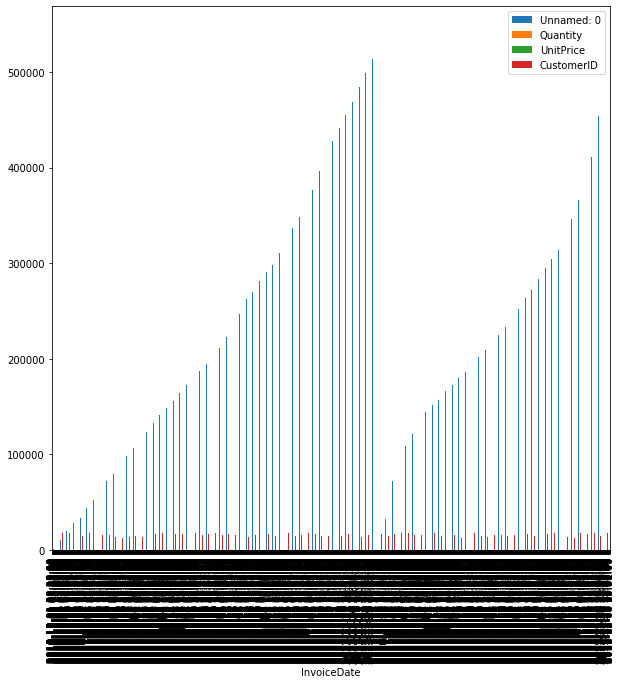

In [5]:
df_view = pd.concat([trans[trans.StockCode=='85123A'], trans[trans.StockCode=='47566']], axis=0)
display(df_view.head(1))

import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
df_view = df_view.set_index('InvoiceDate')
df_view.plot.bar()

In [4]:
df

,length,width
pig,1.5,0.70
rabbit,0.5,0.20
duck,1.2,0.15
chicken,0.9,0.20
horse,3.0,1.10


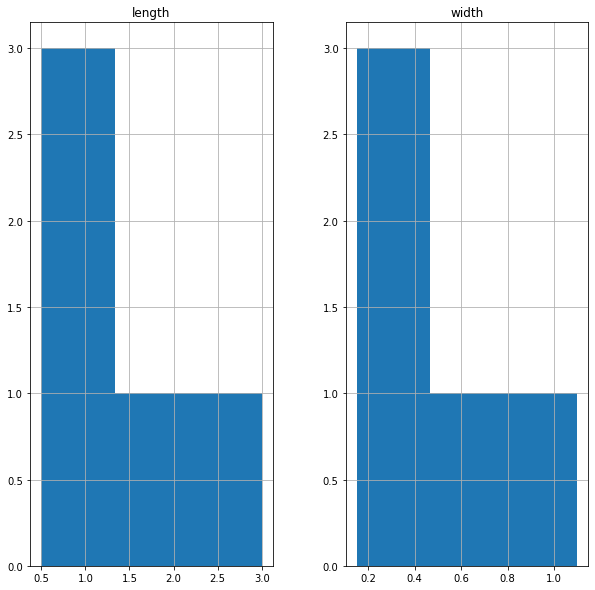

In [22]:
df = pd.DataFrame({
    'length': [1.5, 0.5, 1.2, 0.9, 3],
    'width': [0.7, 0.2, 0.15, 0.2, 1.1]
    }, index=['pig', 'rabbit', 'duck', 'chicken', 'horse'])
hist = df.hist(bins=3)

In [23]:
df.head()

,length,width
pig,1.5,0.70
rabbit,0.5,0.20
duck,1.2,0.15
chicken,0.9,0.20
horse,3.0,1.10


In [ ]:
#AI-TECHGYM-1-11-Q-1
#自然言語処理

#実行場所
import os
os.chdir(r"C:\Users\tsuchida\Documents\techgym_セミナー\TortoiseGit_resorce\techgym_ai\Chapter_1\Answer_sheet\AI_Chapter1_saved_files")

#インポート
import urllib.request
import zipfile

# ファイル整形
import re

#ファイルダウンロード
url = 'https://www.aozora.gr.jp/cards/001847/files/57347_ruby_57225.zip'
zip = '57347_ruby_57225.zip'
urllib.request.urlretrieve(url, zip)

# ダウンロードしたzipの解凍
with zipfile.ZipFile(zip, 'r') as myzip:
  myzip.extractall()
  # 解凍後のファイルからデータ読み込み
  for myfile in myzip.infolist():
    # 解凍後ファイル名取得
    filename = myfile.filename
    # ファイルオープン時にencodingを指定してsjisの変換をする
    with open(filename, encoding='sjis') as file:
      text = file.read()


re.findall('\n\n', text)

In [ ]:
#1-10-(2)

import numpy as np
print('リスト linesの次元数、要素数 : 1, {}'.format(len(lines)))
print('リスト resultsの次元数、要素数 : 2, {}'.format(len(results)))

print('lines、resultsの外側の要素数は、元の文章の行数')

print('resultsの　行数 : 内側のリストの要素数')
for i, result in enumerate(results):
    print('{} : {}'.format(i+1, len(result)))

In [ ]:
print(np.array(results))

In [ ]:
df_trans_sch = trans[trans.InvoiceNo.isin(trans_XY)]
df_trans_X = df_trans_sch[df_trans_sch.StockCode == '85123A']
df_trans_Y = df_trans_sch[df_trans_sch.StockCode == '47566']
df_trans_XY = pd.concat([df_trans_X, df_trans_Y], axis=0)
print(len(df_trans_XY))
df_trans_XY.sort_values('InvoiceDate')